0. Задача: Определение степени зависимости от социальных сетей.

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

1. Чтение данных

In [2]:
url = "https://raw.githubusercontent.com/AndreyBugrov/ML/refs/heads/main/Time_Wasters_on_Social_Media.csv"
raw_data = pd.read_csv(url)

In [3]:
raw_data.shape

(1000, 31)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

Columns Description\
UserID: A unique identifier assigned to each user.\
Age: The age of the user.\
Gender: The gender of the user.\
Location: The geographical location of the user.\
Income: The annual income of the user.\
Debt: Tells If the is in Debt or Not.\
Owns Property: Indicates whether the user owns any property (Yes/No).\
Profession: The profession or job title of the user.\
Demographics: Additional demographic information about the user (Rural or Urban Life).\
Platform: The social media platform used by the user (e.g., Facebook, Instagram, TikTok).\
Total Time Spent: The total time the user has spent on the platform.\
Number of Sessions: The number of sessions the user has had on the platform.\
Video ID: A unique identifier for each video watched.\
Video Category: The category of the video watched (e.g., Entertainment, Gaming, Pranks, Vlog).\
Video Length: The length of the video watched.\
Engagement: The engagement level of the user with the video (e.g., Likes, Comments).\
Importance Score: A score representing the perceived importance of the video to the user.\
Time Spent On Video: The amount of time the user spent watching the video.\
Number of Videos Watched: The total number of videos watched by the user.\
Scroll Rate: The rate at which the user scrolls through content.\
Frequency: How frequently the user logs into the platform.\
Productivity Loss: The amount of productivity lost due to time spent on social media.\
Satisfaction: The satisfaction level of the user with the content consumed.\
Watch Reason: The reason why the user watched the video (e.g., Entertainment, Information).\
DeviceType: The type of device used to access the platform (e.g., Mobile, Desktop).\
OS: The operating system of the device used.\
Watch Time: The specific time of day when the user watched the video.\
Self Control: The user's self-assessed level of self-control while using the platform.\
Addiction Level: The user's self-assessed level of addiction to social media.\
Current Activity: The activity the user was engaged in before using the platform.\
ConnectionType: The type of internet connection used by the user (e.g., Wi-Fi, Mobile Data).\
Числовые признаки:
- UserID
- Age
- Income
- Total Time Spent
- Video Length
- Engagement
- Time Spent On Video
- Number of Videos Watched
- Scroll Rate\
Бинарные признаки:
- Debt
- Owns Property\
Категориальные признаки:
- Gender
- Location
- Profession
- Demographics
- Platform
- Video Category
- Frequency
- Productivity Loss
- Satisfaction
- Watch Reason
- OS
- Watch Time
- Self Control
- Addiction Level
- Current Activity
- ConnectionType

In [5]:
numeric_columns = ["Age",	"Income", "Number of Sessions", "Video Length", "Time Spent On Video", "Number of Videos Watched", "Scroll Rate", "Engagement"]

In [6]:
numeric_columns_set = set(numeric_columns)
for column in raw_data.columns:
  if column not in numeric_columns_set:
    print(f"{column}: {len(raw_data[column].unique())}")
print(raw_data["Location"].unique())

UserID: 1000
Gender: 3
Location: 10
Debt: 2
Owns Property: 2
Profession: 9
Demographics: 2
Platform: 4
Total Time Spent: 278
Video ID: 947
Video Category: 9
Importance Score: 9
Frequency: 4
ProductivityLoss: 9
Satisfaction: 9
Watch Reason: 4
DeviceType: 3
OS: 4
Watch Time: 16
Self Control: 8
Addiction Level: 8
CurrentActivity: 4
ConnectionType: 2
['Pakistan' 'Mexico' 'United States' 'Barzil' 'Vietnam' 'India'
 'Indonesia' 'Philippines' 'Japan' 'Germany']


Исключим следующие признаки:
- UserID - не имеет значение для обучения модели
- VideoID - не имеет значение для обучения модели
- Total Time Spent - не релевантен данной модели

In [7]:
clean_data = raw_data.drop(["UserID", "Video ID", "Total Time Spent"], axis=1)

In [8]:
clean_data["Profession"] = clean_data["Profession"].astype("category")
clean_data["Demographics"] = clean_data["Demographics"].astype("category")
clean_data["Platform"] = clean_data["Platform"].astype("category")
clean_data["Video Category"] = clean_data["Video Category"].astype("category")
clean_data["ProductivityLoss"] = clean_data["ProductivityLoss"].astype("category")
clean_data["Satisfaction"] = clean_data["Satisfaction"].astype("category")
clean_data["Watch Reason"] = clean_data["Watch Reason"].astype("category")
clean_data["OS"] = clean_data["OS"].astype("category")
clean_data["Watch Time"] = clean_data["Watch Time"].astype("category")
clean_data["Self Control"] = clean_data["Self Control"].astype("category")
clean_data["Addiction Level"] = clean_data["Addiction Level"].astype("category")
clean_data["CurrentActivity"] = clean_data["CurrentActivity"].astype("category")
clean_data["ConnectionType"] = clean_data["ConnectionType"].astype("category")

In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1000 non-null   int64   
 1   Gender                    1000 non-null   object  
 2   Location                  1000 non-null   object  
 3   Income                    1000 non-null   int64   
 4   Debt                      1000 non-null   bool    
 5   Owns Property             1000 non-null   bool    
 6   Profession                1000 non-null   category
 7   Demographics              1000 non-null   category
 8   Platform                  1000 non-null   category
 9   Number of Sessions        1000 non-null   int64   
 10  Video Category            1000 non-null   category
 11  Video Length              1000 non-null   int64   
 12  Engagement                1000 non-null   int64   
 13  Importance Score          1000 non-null   int64  

2.1 Вычисление характеристик

In [10]:
clean_data.describe()

,Age,Income,Number of Sessions,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,59524.213000,10.013000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000
std,13.497852,23736.212925,5.380314,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798
min,18.000000,20138.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000
25%,29.000000,38675.250000,6.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000
50%,42.000000,58805.000000,10.000000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000
75%,52.000000,79792.250000,15.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000
max,64.000000,99676.000000,19.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000



min: минимальное значение признака\
max: максимальное значение признака\
mean: среднее значение\
std: среднеквадратическое отклонение\
25%: первый квартиль (значение, ниже которого лежит 25% значений)\
50%: медиана (значение, 50% значений меньше которого, a другие 50% - больше)\
75%: третий квартиль (значение, ниже которого лежит около 75% значений)

2.2 Корреляционная матрица

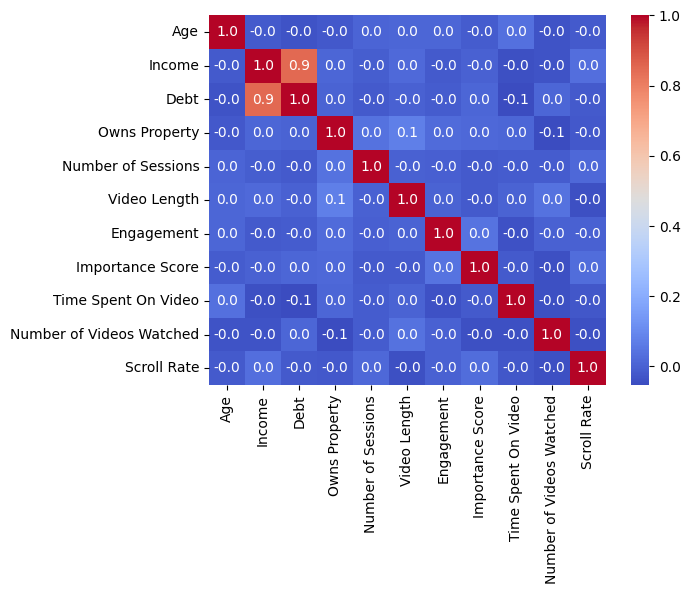

In [11]:
corr_mat = clean_data.corr(numeric_only=True)
# corr_mat = data[numeric_columns].corr(numeric_only=True)
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', fmt=".1f")
pass

3. Доказательство отсутствия пропущенных значений

In [12]:
clean_data.isnull().sum().sum()

0

In [13]:
clean_data['Addiction Level'].value_counts()

,count
Addiction Level,
2,248
5,228
0,180
3,159
1,60
7,55
4,36
6,34


In [14]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(clean_data, alpha = .01, figsize = (10, 10))
# pass

4. Обработка категориальных признаков

In [15]:
from sklearn.preprocessing import OneHotEncoder
from copy import copy
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
numeric_colums_plus_target_column = copy(numeric_columns)
numeric_colums_plus_target_column.append("Addiction Level")
not_numeric_columns = list(set(clean_data.columns).difference(set(numeric_colums_plus_target_column)))
enc.fit(clean_data[not_numeric_columns])

dummies = pd.DataFrame(enc.transform(clean_data[not_numeric_columns]),
                       columns=enc.get_feature_names_out(), index=clean_data.index)
data = pd.concat((clean_data, dummies), axis=1).drop(not_numeric_columns, axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 118 entries, Age to Satisfaction_9
dtypes: category(1), float64(109), int64(8)
memory usage: 915.5 KB


5. Нормализация

In [17]:
data_numeric = data[numeric_columns]
data_numeric = (data_numeric - data_numeric.min(axis = 0))/(data_numeric.max(axis = 0) - data_numeric.min(axis = 0))

In [18]:
data_numeric

,Age,Income,Number of Sessions,Video Length,Time Spent On Video,Number of Videos Watched,Scroll Rate,Engagement
0,0.826087,0.787976,0.888889,0.821429,0.892857,0.437500,0.877551,0.787800
1,0.608696,0.098833,0.722222,0.642857,0.857143,0.625000,0.459184,0.594863
2,0.304348,0.280344,0.277778,0.642857,0.285714,0.125000,0.887755,0.868767
3,0.913043,0.538422,1.000000,0.107143,0.178571,0.833333,0.938776,0.247015
4,0.152174,0.024617,0.277778,0.642857,0.428571,0.416667,0.030612,0.308819
...,...,...,...,...,...,...,...,...
995,0.086957,0.680379,0.333333,0.000000,0.571429,0.333333,0.469388,0.518110
996,0.478261,0.086349,0.777778,0.035714,0.035714,0.333333,0.142857,0.179392
997,0.195652,0.931379,0.000000,0.392857,0.285714,0.562500,0.438776,0.930571
998,0.934783,0.819809,0.555556,0.500000,0.392857,0.604167,0.622449,0.204174


In [19]:
for numeric_column in numeric_columns:
  data[numeric_column] = copy(data_numeric[numeric_column])

In [20]:
data.describe()

,Age,Income,Number of Sessions,Video Length,Engagement,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss_1,ProductivityLoss_2,...,Gender_Other,Satisfaction_1,Satisfaction_2,Satisfaction_3,Satisfaction_4,Satisfaction_5,Satisfaction_6,Satisfaction_7,Satisfaction_8,Satisfaction_9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.499696,0.495187,0.500722,0.507643,0.499865,0.499036,0.505167,0.497694,0.055000,0.03400,...,0.164000,0.037000,0.145000,0.060000,0.247000,0.158000,0.036000,0.228000,0.03400,0.055000
std,0.293432,0.298426,0.298906,0.293748,0.291969,0.292860,0.292274,0.297937,0.228094,0.18132,...,0.370461,0.188856,0.352277,0.237606,0.431483,0.364924,0.186383,0.419753,0.18132,0.228094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.239130,0.233062,0.277778,0.250000,0.240870,0.250000,0.270833,0.224490,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.521739,0.486145,0.500000,0.500000,0.501756,0.500000,0.500000,0.500000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.739130,0.750009,0.777778,0.750000,0.755017,0.750000,0.750000,0.744898,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [21]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Age,Income,Number of Sessions,Video Length,Engagement,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss_1,ProductivityLoss_2,...,Gender_Other,Satisfaction_1,Satisfaction_2,Satisfaction_3,Satisfaction_4,Satisfaction_5,Satisfaction_6,Satisfaction_7,Satisfaction_8,Satisfaction_9
Age,1.000000,-0.017923,0.006563,0.009557,0.010417,0.034535,-0.033776,-0.018768,0.049670,0.023508,...,0.002662,0.036723,-0.003362,-0.001611,-0.040999,-0.026782,-0.002983,0.016818,0.023508,0.049670
Income,-0.017923,1.000000,-0.009979,0.017432,-0.017183,-0.041666,-0.036211,0.029066,-0.008620,0.044163,...,0.060692,0.020126,0.019536,0.053298,-0.008598,-0.000768,-0.031091,-0.046703,0.044163,-0.008620
Number of Sessions,0.006563,-0.009979,1.000000,-0.002076,-0.007600,-0.014127,-0.012761,0.013610,-0.032394,-0.037392,...,-0.013626,0.046813,0.079281,-0.013139,-0.007421,-0.022460,-0.015440,-0.012395,-0.037392,-0.032394
Video Length,0.009557,0.017432,-0.002076,1.000000,0.001286,0.004256,0.037753,-0.044744,-0.043096,-0.012267,...,0.042676,0.003919,-0.005883,-0.024504,-0.022243,0.042084,-0.020702,0.041232,-0.012267,-0.043096
Engagement,0.010417,-0.017183,-0.007600,0.001286,1.000000,-0.040716,-0.000719,-0.001441,0.016646,0.051135,...,0.019815,0.011388,-0.021492,0.012429,0.007782,-0.052603,0.027693,0.000179,0.051135,0.016646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Satisfaction_5,-0.026782,-0.000768,-0.022460,0.042084,-0.052603,-0.010615,0.015606,-0.031781,-0.104505,-0.081269,...,0.052482,-0.084910,-0.178391,-0.109442,-0.248098,1.000000,-0.083712,-0.235413,-0.081269,-0.104505
Satisfaction_6,-0.002983,-0.031091,-0.015440,-0.020702,0.027693,0.000637,0.024911,0.029455,-0.046621,-0.036255,...,-0.027603,-0.037879,-0.079582,-0.048823,-0.110679,-0.083712,1.000000,-0.105020,-0.036255,-0.046621
Satisfaction_7,0.016818,-0.046703,-0.012395,0.041232,0.000179,0.011387,0.037134,0.001350,-0.131106,-0.101955,...,-0.047584,-0.106524,-0.223800,-0.137300,-0.311250,-0.235413,-0.105020,1.000000,-0.101955,-0.131106
Satisfaction_8,0.023508,0.044163,-0.037392,-0.012267,0.051135,-0.034390,-0.022207,0.035109,-0.045260,1.000000,...,-0.008584,-0.036774,-0.077259,-0.047398,-0.107449,-0.081269,-0.036255,-0.101955,1.000000,-0.045260


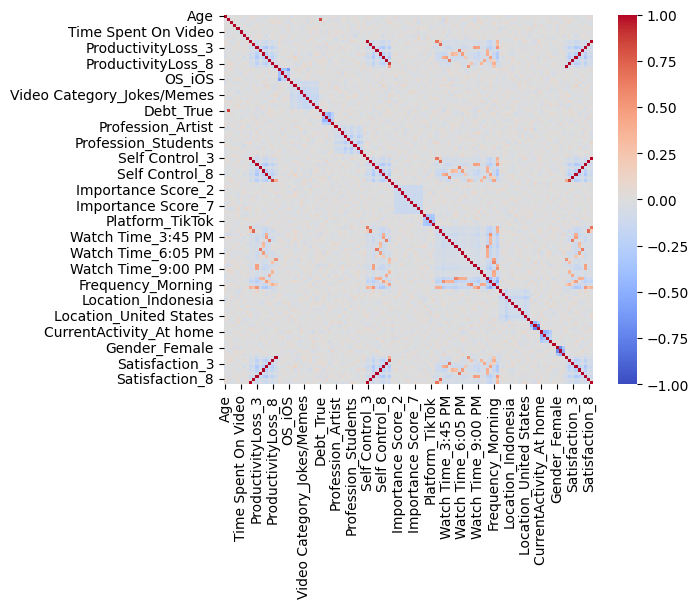

In [22]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

6 Обучающая и тестовая выборки

Для классификации используем все признаки. Разобьем данные на обучающую и тестовую выборки. За обучающую примем 75%, оставшиеся  - за тестовую

In [23]:
removed_data = copy(data)
removed_data = removed_data.drop(['Addiction Level'], axis=1)
y = data["Addiction Level"]
X = removed_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(750, 250)

In [24]:
# mean = X_train.mean(axis = 0)
# std = X_train.std(axis = 0)

# X_train = (X_train - mean) / std
# X_test =  (X_test  - mean) / std

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

7. K ближайших соседей\
по умолчанию 5\
Это наиболее простая модель, поэтому начать стоит именно с неё.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
# y_train_predict = model.predict(X_train)
# y_test_predict  = model.predict(X_test)
train_pred = 100 * model.score(X_train, y_train)
test_pred = 100 * model.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(train_pred, test_pred))

Accuracy. Train : 99.87%, Test: 99.60%. 


8. Найдём оптимальное количество соседей

In [26]:
best_neighbours_count = 1
best_train_pred = 0.0
best_test_pred = 0.0
for neighbors_count in range(1, 50):
  knn_def = KNeighborsClassifier(n_neighbors=10)
  knn_def.fit(X_train, y_train)
  knn_train_pred = 100 * knn_def.score(X_train, y_train)
  knn_test_pred = 100 * knn_def.score(X_test, y_test)
  if best_test_pred < knn_test_pred:
    best_neighbours_count = neighbors_count
    best_train_pred = knn_train_pred
    best_test_pred = knn_test_pred
print(f"Best neighbours count: {best_neighbours_count}. Train : {best_train_pred:.2f}%, Test: {best_test_pred:.2f}%.")

Best neighbours count: 1. Train : 99.87%, Test: 99.60%.


9. Вывод: Задача оказалась достаточно простой, поэтому ошибка на тесте слабо меньше ошибки на трейне. Да и вообще ошибки небольшие

10. Другие классификаторы

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
# y_train_predict = model.predict(X_train)
# y_test_predict  = model.predict(X_test)
train_pred = 100 * model.score(X_train, y_train)
test_pred = 100 * model.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(train_pred, test_pred))

Accuracy. Train : 100.00%, Test: 99.60%. 


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
train_pred = 100 * model.score(X_train, y_train)
test_pred = 100 * model.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(train_pred, test_pred))

Accuracy. Train : 100.00%, Test: 99.60%. 


In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_depth': 5, 'n_estimators': 100}


Простоты модели много не бывает. Но, как видно из примера выше, бывает переобучение. Хотя здесь какая разница...

11. Моя борьба с несбалансированностью классов

Учтём тот факт, что для k ближайших соседей сбалансированность классов не играет никакой роли, поэтому будем балансировать логистическую регрессию.

In [30]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

weighted_model = LogisticRegression(random_state=42, max_iter=1000, class_weight=class_weights)
weighted_model.fit(X_train, y_train)

weight_train_pred = 100 * weighted_model.score(X_train, y_train)
weight_test_pred = 100 * weighted_model.score(X_test, y_test)
print(f"Train : {weight_train_pred:.2f}%, Test: {weight_test_pred:.2f}%.")

Train : 100.00%, Test: 99.60%.


12. Исключение коррелированных переменных\
Позволяет добиться увеличения устойчивости модели и увеличивает производительность.

In [36]:
from sklearn.metrics import confusion_matrix
y_test_predict = weighted_model.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[43  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0]
 [ 1  0  0 40  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0 59  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0 23]]


In [35]:
corr_threshold = 0.75
corr_matrix = X.corr(numeric_only=True)
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix.loc[i, j]) > corr_threshold]

unique_pairs_set = set(frozenset(pair) for pair in high_corr_pairs)
unique_pairs = [tuple(pair) for pair in unique_pairs_set]

X_reduced = copy(pd.DataFrame(X, columns=X.columns))
columns_to_drop = {pair[0] for pair in unique_pairs}
X_reduced = X_reduced.drop(columns=columns_to_drop)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.25, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000, class_weight=class_weights)
model.fit(X_train_reduced, y_train_reduced)

model_train_reduced_pred = 100 * model.score(X_train_reduced, y_train_reduced)
model_test_reduced_pred = 100 * model.score(X_test_reduced, y_test_reduced)

print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(model_train_reduced_pred, model_test_reduced_pred))

y_test_predict_reduced = model.predict(X_test_reduced)
print(confusion_matrix(y_test_reduced, y_test_predict_reduced))

Accuracy. Train : 99.87%, Test: 99.60%. 
[[43  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0]
 [ 1  0  0 40  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0 59  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0 23]]


На трейне стало хуже, на тесте не изменилось. Зато быстрее и устойчивей, что может сыграть свою роль в более жизненных ситуациях.

13. Общий вывод\
На данной выборке почти нет смысла использовать какие-либо хитрые вещи вроде RandomForest или логистической регрессии, так как изначально ошибка не очень большая. Причиной служит то, что модель достаточно простая и, видимо, данные близки. Но, конечно, если очень важна точность (если по законом требуется сильно зависимого ребёнка бросать с обрыва, как в Спарте), можно применить и их.